In [0]:
# SVC with linear kernel
# based on libsvm, non-linear svm used on binary or multiclass classification

In [0]:
# Lib preparation
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection, svm

In [0]:
# diabetes dataset extraction, for regression problem
# diabetes dataset, 442 samples, 10 features(all numeric floats), the label is between integer 25 ~ 346

def load_data_regression():
  diabetes = datasets.load_diabetes()
  return model_selection.train_test_split(diabetes.data, diabetes.target, test_size=.25, random_state=0)

In [0]:
# iris dataset, for classification problem
# 150 dps, 3 classes, 4 features
# we use stratified sampling here, since samples ordered by y_train, the first 50 samples are of label 0 and the later 50 are of label 1
def load_data_classification():
  iris = datasets.load_iris()
  return model_selection.train_test_split(iris.data, iris.target, test_size=.25, random_state=0, stratify=iris.target)

In [0]:
# sklearn.svm.SVC()
## Params
# C: penalty
# kernel: 'linear' means K(x,z)=x dot z; 'poly' means k(x,z)=(y(x dot z +1)+r)^p; 'rbf': default value means gaussian k(x,z)=exp(-y||x-z||^2), y depends on gamma coefficient; 'sigmoid' means k(x,z) = tanh(y(x dot z)+r), y depends gamma, r depends on coef theta; 'precomputed' means providing kernel matrix, or a callable, to compute kernel matrix
# degree: a integer, when poly, this is the coefficient p. Will be not used for other kernel funcs
# gamma: float, the coefficient when the kernel is 'rbf' or 'poly' or 'sigmoid', if 'auto', means the gamma is 1/n_features
# coef0: float, the noise r in kernel function
# probability: bool, True to compute probs, it should be preset before training, it could slower down the speed to some degree
# shrinking: bool, True then use shrinking heuristic
# tol: float, threshold to quit iterations
# cache_size: float, assign the size of kernel cache, unit is MB
# class_weight: a dict or a string 'balanced', for the weight of every class, if not given, the weight of the class is 1
# verbose: integer for beginning verbose output
# random_state: integer or RandomState instance or None
# max_iter: a integer, the max times of iteration
# decision_function_shape: string or None, assign the shape of decision function. 'ovr' means using one-vs-rest, the shape of decision function would be (n_samples, n_classes); 'ovo' means one-vs-one, n_samples,n_classes*(n_classes-1)/2; None means use default value, right now it is 'ovr'
# 
## Attributes
# support_: array, shape is [n_SV], for support vectors
# support_vectors_: array, [n_SV, n_features]
# n_support_: array-like, shape could be [n_class], the number of sv for every class
# dual_coef_: an array, shape is -n_class-1, n_SV, when dual, the coefficients of every SV
# coef_: [n_class-1, n_features], the coefficient of each feature on orginal problem, it only works at linear kernel
# intercept_: array for intercept, as constant one in decision func
# 
## Methods
# fit(X,y)
# predict(X)
# score(X,y), return accuracy
# predict_log_proba(X)
# predict_proba(X)    

In [0]:
# test non linear SVC with linear kernel
def test_SVC_linear(*data):
  X_train, X_test, y_train, y_test = data
  cls = svm.SVC(kernel='linear')
  cls.fit(X_train, y_train)
  print('Coef:%s, intercept %s'%(cls.coef_,cls.intercept_))
  print('Score:%.2f'%cls.score(X_test, y_test))

In [0]:
X_train, X_test, y_train, y_test = load_data_classification()
test_SVC_linear(X_train, X_test, y_train, y_test)

Coef:[[-0.16990304  0.47442881 -0.93075307 -0.51249447]
 [ 0.02439178  0.21890135 -0.52833486 -0.25913786]
 [ 0.52289771  0.95783924 -1.82516872 -2.00292778]], intercept [2.0368826 1.1512924 6.3276538]
Score:1.00


In [0]:
# now consider the poly kernel
def test_SVC_poly(*data):
  X_train, X_test, y_train, y_test = data
  fig=plt.figure()
  degrees=range(1,20)
  train_scores=[]
  test_scores=[]
  # test degrees
  for degree in degrees:
    cls = svm.SVC(kernel='poly',degree=degree)
    cls.fit(X_train, y_train)
    train_scores.append(cls.score(X_train, y_train))
    test_scores.append(cls.score(X_test,y_test))
  fig=plt.figure()
  ax=fig.add_subplot(1,3,1)
  ax.plot(degrees, train_scores, label='Training_score', marker='+')
  ax.plot(degrees, test_scores, label='Testing_score', marker='o')
  ax.set_xlabel('p')
  ax.set_ylabel('score')
  ax.set_ylim(0,1.05)
  ax.set_title('SVC_Poly_degree')
  ax.legend(loc='best',framealpha=.5)
  # test gamma
  gammas=range(1,20)
  train_scores=[]
  test_scores=[]
  for gamma in gammas:
    cls = svm.SVC(kernel='poly',degree=3, gamma=gamma)
    cls.fit(X_train, y_train)
    train_scores.append(cls.score(X_train, y_train))
    test_scores.append(cls.score(X_test,y_test))
  ax=fig.add_subplot(1,3,2)
  ax.plot(gammas, train_scores, label='Training_score', marker='+')
  ax.plot(gammas, test_scores, label='Testing_score', marker='o')
  ax.set_xlabel(r'$\gamma$')
  ax.set_ylabel('score')
  ax.set_ylim(0,1.05)
  ax.set_title('SVC_Poly_gamma')
  ax.legend(loc='best',framealpha=.5)
  # test r
  rs=range(0,20)
  train_scores=[]
  test_scores=[]
  for r in rs:
    cls = svm.SVC(kernel='poly',degree=3, gamma=10,coef0=r)
    cls.fit(X_train, y_train)
    train_scores.append(cls.score(X_train, y_train))
    test_scores.append(cls.score(X_test,y_test))
  ax=fig.add_subplot(1,3,3)
  ax.plot(rs, train_scores, label='Training_score', marker='+')
  ax.plot(rs, test_scores, label='Testing_score', marker='o')
  ax.set_xlabel(r'r')
  ax.set_ylabel('score')
  ax.set_ylim(0,1.05)
  ax.set_title('SVC_Poly_r')
  ax.legend(loc='best',framealpha=.5)
  plt.show()

<Figure size 432x288 with 0 Axes>

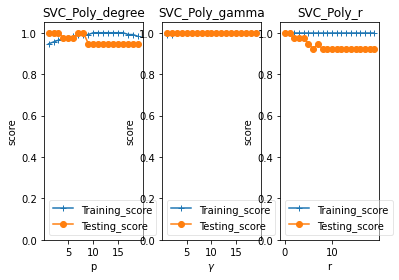

In [0]:
X_train, X_test, y_train, y_test = load_data_classification()
test_SVC_poly(X_train, X_test, y_train, y_test)
# no big effect from gamma
# the best at r=0
# with p increase, the performance converges